In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import math

In [ ]:
headers = {
    'authority': 'www.amazon.com',
    'cache-control': 'max-age=0',
    'rtt': '300',
    'downlink': '1.35',
    'ect': '3g',
    'sec-ch-ua': '"Google Chrome"; v="83"',
    'sec-ch-ua-mobile': '?0',
    'upgrade-insecure-requests': '1',
    'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/83.0.4103.106 Safari/537.36',
    'accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9',
    'sec-fetch-site': 'none',
    'sec-fetch-mode': 'navigate',
    'sec-fetch-user': '?1',
    'sec-fetch-dest': 'document',
    'accept-language': 'en-GB,en-US;q=0.9,en;q=0.8',
    'cookie': 'aws-priv=eyJ2IjoxLCJldSI6MCwic3QiOjB9; session-id=139-7350741-1081713; ubid-main=135-9894765-6184621; lc-main=en_US; s_fid=0A4730DDD06B62E4-1DB478AB62143F35; regStatus=pre-register; x-main=hd2N9IEBuVL7il1dbkhEEHTQSf4Q7uviwjc2eikr0hRGGOyI2RYIiRsk3GvDKLSx; at-main=Atza|IwEBIJdoAZ4Y6j2IIGvC29t1ha634aK-p2kAl8rHhQRCSGMSU_nwQvM6fakAbYEjpVLPU4Jj0TwKvX70d6QnlouKPh0QwpHJG8rHUNVb-gmhS9shHM8fCJk45r1XW2FOSpLoM1iAO9kYIpOoW2M5We9xfdqlLuQBB-D5fQeO5Vqew4RnHesPNZuF4DQNlcqL7wrGjDY1JQKzlzARfATAuwaCy4jMD5bNmxpcWtTgNGrTtLpGv1Y-4Mnx2axxQYFgwpRNv_sPNZrMAfHdU7MX67HbyPyV3V21KAl8QNl0xE-lNl3myxnfyWH68Z5D-j501S7HWzkKxopy3SfGuwwZTjSVSVlnH4RmTwvEnW8W3tndcX6X1ETysYYXmO7TudIjtq7aUZqPBJe_MViePcWL3OV4q2b5; sess-at-main="TjcvTeXAA2dP6HOMGcG/n+Cdkr+peDBlNMOvfBz6oE0="; sst-main=Sst1|PQGR5AF9x4yS-iMft3B9aBzJC8v-e4M1kmB_3KS0pxtVTj1cH8hl3fajgigt6xEYhan-kUJuY5KNbteBgbiyDIRCs4ISve5MdRhDdoy7XKrVD1g5McZTyvdwYLfbTJbTUov51hOyPcE8BKpFL1bGpJiiJbZ0TV7Pyc6tkndogjneZATDErc4U08WE4LwPJxCiF-I-7Av4-JEfwH1ZQ81mz6rqy-K1o6bCMRRZ8kWuzrl0wobKsr4Sz0-m1K0waguIewhXNm4V4DLe8mn-_6I8_k9p9v3NiFRpp04v0Ptzw8V1ARo2U18t5f2nx54EXwHzvzOQlpeBVY2U0WpXDcKsU3C8Q; session-id-time=2082787201l; i18n-prefs=USD; x-wl-uid=1MwJyD7dRnGiVdHw1PKiwmoNP9S/0xy+3KAKCJl2fM5VOthLzEW3dzyeW4zdKAepcIxkXpJFkxWcafUXXcS0MeSyLyFoBkl3xnNPLiRK0Rq33AHw0gL3W1FDBUn9OcakOzJGVGKZRc5E=; s_vn=1614974634531%26vn%3D4; s_nr=1590823888871-Repeat; s_vnum=2022823888872%26vn%3D1; s_dslv=1590823888874; sp-cdn="L5Z9:FR"; session-token=3AIPjoIrP8ITt1e/KXLZGSlnOPpirrWotNpCpCEfNRCY9mCfAV169URMcAX8XECtxt/qJujUn66Oyz8KIFDMieNmSdzEKA0K8I4AqbzplslzVGtZ6rNg+XsX/Bdc3hxnB7tUqQhrbrtVUncdzUMN1c95vhL7p+AEog3iiDkhLch0VO+Sl8HkAdZ/63xrp0stAaUsYo1GgsOFGI8+3wJUp4CHrJnoj/0lqjCJCpgXTZfxJcfWy9KarcGAPkno+fuMQqMoShJdi8R+DZ9XmIMib1bsLwXnerZa; csm-hit=tb:GVY0F2K4G05TXW59KB9M+s-GVY0F2K4G05TXW59KB9M|1592424615451&t:1592424615452&adb:adblk_yes',
}

In [ ]:
product_links = []
title = []
username = []
rating = []
time_date = []
rev = []

In [ ]:
for x in range(0,20):
  link = f"https://www.amazon.com/Wireless-Communicator-Android-Bluetooth-PlayStation-5/product-reviews/B09VCJ2T1G/ref=cm_cr_arp_d_viewopt_srt?ie=UTF8&reviewerType=all_reviews&sortBy=recent&pageNumber={x}"
  product_links.append(link)

for links in product_links:
  r = requests.get(links, headers=headers)
  soup = BeautifulSoup(r.content)
  review = soup.find(name="div", class_="a-section a-spacing-none review-views celwidget")
  brand_name= soup.find(name="a", class_="a-size-base a-link-normal").getText()
  product_name=soup.find(name="a",class_="a-link-normal")
  for item in review:
    review_title = item.find(name="a", class_="a-size-base a-link-normal review-title a-color-base review-title-content a-text-bold")
    reviewer_name = item.find(name="span", class_="a-profile-name")
    review_rating = item.find(name="span", class_="a-icon-alt")
    review_time_date = item.find(name="span", class_="a-size-base a-color-secondary review-date")
    review_r = item.find(name="span", class_="a-size-base review-text review-text-content")
    try:
      # review_title = review_title.getText()
      # title.append(review_title)
      reviewer_name = reviewer_name.getText()
      username.append(reviewer_name)
      review_rating = review_rating.getText()
      rating.append(review_rating)
      review_time_date = review_time_date.getText()
      time_date.append(review_time_date)
      review_r = review_r.getText()
      rev.append(review_r)
    except:
      print(" ")


In [ ]:
df = pd.DataFrame({'productName':product_name, "brandName": brand_name,"username": username,"type":"headsets", 'rating': rating, 'review_text': rev, 'date_text': time_date})

In [ ]:
df_history = pd.read_csv('/content/drive/MyDrive/external hard drive.csv')
df_merged = pd.concat([df, df_history], axis=0)
df_merged.to_csv('dataframe.csv', index = None)
print(df_merged)

In [ ]:
df_history = pd.read_csv('/content/drive/MyDrive/dataframe.csv')
df_merged = pd.concat([df, df_history], axis=0)
df_merged.to_csv('final_dataset.csv', index = None)
df_merged.shape

In [ ]:
df_history = pd.read_csv('/content/drive/MyDrive/symum dr kaj/mouse (1).csv')
df_merged = pd.concat([df_merged, df_history], axis=0)
df_merged.to_csv('final_dataset.csv', index = None)
df_merged.shape

In [ ]:
df = pd.read_csv('/content/final_dataset.csv')
df.shape

In [ ]:
df2.to_csv('final_dataset_v1.csv', index = None)

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/final_dataset_v1.csv')
df.shape

In [ ]:
newlist = [math.floor(float(x.split()[0])) for x in df['rating']]

In [ ]:
df["rating_v1"] = newlist
df

In [ ]:
import datetime

# example string
review_str = "Reviewed in the United States on November 29, 2020"

# extract date string
date_str = review_str.split("on ")[1]

# convert to date object
date_obj = datetime.datetime.strptime(date_str, "%B %d, %Y").date()

print(date_obj)

In [ ]:
import datetime
date_str = [ datetime.datetime.strptime(x.split("on ")[1], "%B %d, %Y").date() for x in df["date_text"]]
len(date_str)
date_str

In [ ]:
date = [ x.strftime("%Y-%m-%d") for x in date_str]

In [ ]:
df['date']=date

,productName,brandName,username,type,rating,review_text,date_text,rating_v1,date
0,Cable Matters 3-Pack High Speed HDMI Cable 15 ...,Cable Matters,Ryan Patrick Nicholl,HDMI Cable,5.0 out of 5 stars,\nI can't demand much more from an HDMI cable.\n,"Reviewed in the United States on November 29, ...",5,2020-11-29
1,Cable Matters 3-Pack High Speed HDMI Cable 15 ...,Cable Matters,Cam,HDMI Cable,5.0 out of 5 stars,\nVery nice product. Quality cables. Color cod...,"Reviewed in the United States on November 28, ...",5,2020-11-28
2,Cable Matters 3-Pack High Speed HDMI Cable 15 ...,Cable Matters,Joel DeJesus,HDMI Cable,3.0 out of 5 stars,\nThese cables were packaged nicely with each ...,"Reviewed in the United States on November 23, ...",3,2020-11-23
3,Cable Matters 3-Pack High Speed HDMI Cable 15 ...,Cable Matters,P. Solis,HDMI Cable,5.0 out of 5 stars,\nI dislike typing anything to leave anything ...,"Reviewed in the United States on November 21, ...",5,2020-11-21
4,Cable Matters 3-Pack High Speed HDMI Cable 15 ...,Cable Matters,bob nolan,HDMI Cable,5.0 out of 5 stars,\nGreat cables - works in a setup at a church ...,"Reviewed in the United States on November 16, ...",5,2020-11-16
...,...,...,...,...,...,...,...,...,...
29750,Amazon Basics Wireless Computer Mouse with USB...,Amazon Basics,glttrgal,mouse,1.0 out of 5 stars,\nI bought one a year ago and based on the thr...,"Reviewed in the United States on January 3, 2023",1,2023-01-03
29751,Amazon Basics Wireless Computer Mouse with USB...,Amazon Basics,Andre,mouse,1.0 out of 5 stars,"\nWorked well at first, but then it started lo...","Reviewed in the United States on January 2, 2023",1,2023-01-02
29752,Amazon Basics Wireless Computer Mouse with USB...,Amazon Basics,JayD,mouse,5.0 out of 5 stars,\nA great mouse used with day to day computer ...,"Reviewed in the United States on January 2, 2023",5,2023-01-02
29753,Amazon Basics Wireless Computer Mouse with USB...,Amazon Basics,Amazon Customer,mouse,2.0 out of 5 stars,\nNeeded a new mouse and this wireless was a n...,"Reviewed in the United States on January 2, 2023",2,2023-01-02


In [ ]:
newdf = df.drop(["date_text","rating"], axis='columns')

In [ ]:
newdf.to_csv("final_dataset_v2.csv", index = None)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from matplotlib import style
style.use('ggplot')
import re
import nltk
nltk.download('all')
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/final_dataset_v2.csv')

In [ ]:
recommended = [ "yes" if x>3 else "no" for x in df['rating_v1']]
recommended

In [ ]:
df['recommended'] = recommended

In [ ]:
df.to_csv("final_dataset_v3.csv", index = None )

In [ ]:
sns.countplot(x='recommended', data=df)
plt.title("Sentiment Of Reviews")


In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from tqdm.notebook import tqdm
import nltk
import string
import re
%matplotlib inline
pd.set_option('display.max_colwidth', 100)
plt.style.use('ggplot')

In [ ]:
nltk.download('all')

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/final_dataset_v3.csv')

<Axes: xlabel='recommended', ylabel='count'>

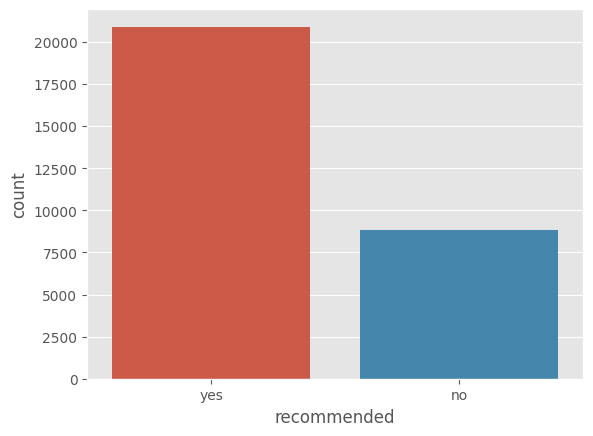

In [ ]:
sns.countplot(x = 'recommended', data = df)

(-0.5, 399.5, 199.5, -0.5)

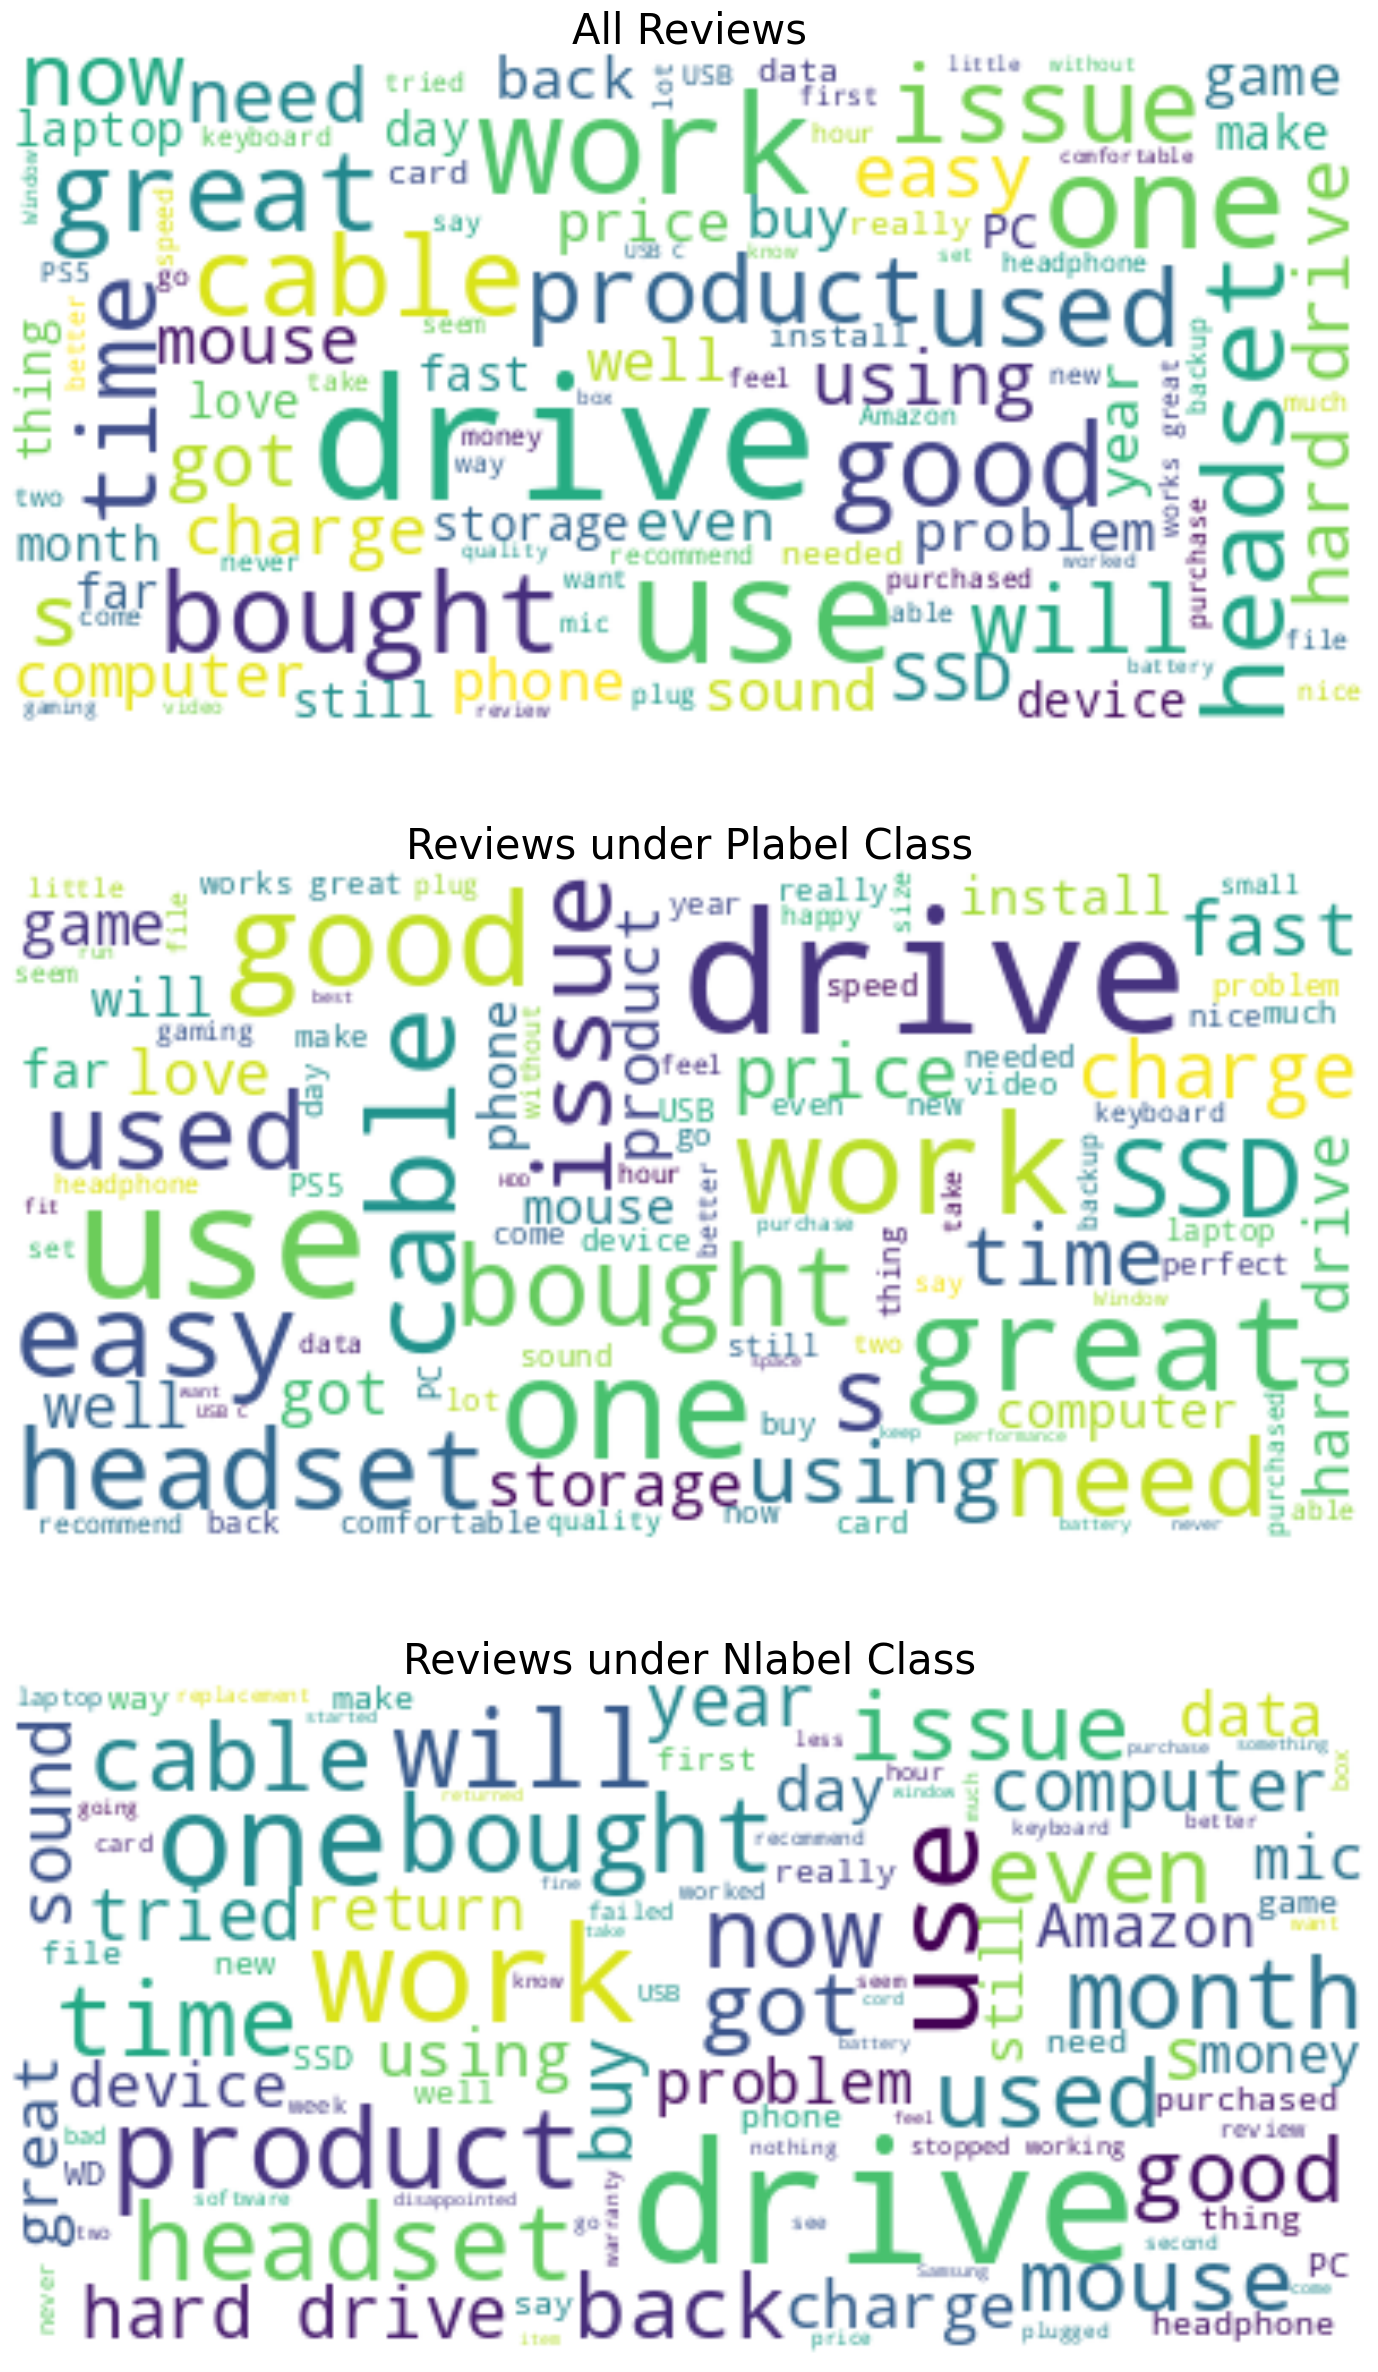

In [ ]:
from wordcloud import WordCloud, STOPWORDS , ImageColorGenerator
# Start with one review:
df_Plabel = df[df['recommended']=="yes"]
df_Nlabel = df[df['recommended']=='no']
review_All = " ".join(str(review) for review in df.review_text)
review_Plabel = " ".join(str(review) for review in df_Plabel.review_text)
review_Nlabel = " ".join(str(review) for review in df_Nlabel.review_text)

fig, ax = plt.subplots(3, 1, figsize  = (30,30))
# Create and generate a word cloud image:
wordcloud_ALL = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(review_All)
wordcloud_Plabel = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(review_Plabel)
wordcloud_Nlabel = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(review_Nlabel)

# Display the generated image:
ax[0].imshow(wordcloud_ALL, interpolation='bilinear')
ax[0].set_title('All Reviews', fontsize=30)
ax[0].axis('off')
ax[1].imshow(wordcloud_Plabel, interpolation='bilinear')
ax[1].set_title('Reviews under Plabel Class',fontsize=30)
ax[1].axis('off')
ax[2].imshow(wordcloud_Nlabel, interpolation='bilinear')
ax[2].set_title('Reviews under Nlabel Class',fontsize=30)
ax[2].axis('off')

In [ ]:
df['review_text'] = [str(x) for x in df['review_text']]

In [ ]:
def remove_punct(text):
    text  = "".join([char for char in text if char not in string.punctuation])
    text = re.sub('[0-9]+', '', text)
    return text

df['punctuation_removed'] = df['review_text'].apply(lambda x: remove_punct(x))
df.head(10)

,productName,brandName,username,type,review_text,rating_v1,date,recommended,punctuation_removed
0,"Cable Matters 3-Pack High Speed HDMI Cable 15 ft with 4K @60Hz, 2K...",Cable Matters,Ryan Patrick Nicholl,HDMI Cable,\nI can't demand much more from an HDMI cable.\n,5,2020-11-29,yes,\nI cant demand much more from an HDMI cable\n
1,"Cable Matters 3-Pack High Speed HDMI Cable 15 ft with 4K @60Hz, 2K...",Cable Matters,Cam,HDMI Cable,\nVery nice product. Quality cables. Color coding helps you remember what cord it attached to wh...,5,2020-11-28,yes,\nVery nice product Quality cables Color coding helps you remember what cord it attached to what\n
2,"Cable Matters 3-Pack High Speed HDMI Cable 15 ft with 4K @60Hz, 2K...",Cable Matters,Joel DeJesus,HDMI Cable,\nThese cables were packaged nicely with each units own ziplock pouch. Two of the three cables w...,3,2020-11-23,no,\nThese cables were packaged nicely with each units own ziplock pouch Two of the three cables wo...
3,"Cable Matters 3-Pack High Speed HDMI Cable 15 ft with 4K @60Hz, 2K...",Cable Matters,P. Solis,HDMI Cable,\nI dislike typing anything to leave anything other than stars to leave review.\n,5,2020-11-21,yes,\nI dislike typing anything to leave anything other than stars to leave review\n
4,"Cable Matters 3-Pack High Speed HDMI Cable 15 ft with 4K @60Hz, 2K...",Cable Matters,bob nolan,HDMI Cable,\nGreat cables - works in a setup at a church I put in for big video screens - hopping from comp...,5,2020-11-16,yes,\nGreat cables works in a setup at a church I put in for big video screens hopping from comput...
5,"Cable Matters 3-Pack High Speed HDMI Cable 15 ft with 4K @60Hz, 2K...",Cable Matters,Bugalito,HDMI Cable,\nI purchased this 3 foot set of HDMI cables to use with my TIVO and my ROKU. I got it all set ...,1,2020-11-09,no,\nI purchased this foot set of HDMI cables to use with my TIVO and my ROKU I got it all set up...
6,"Cable Matters 3-Pack High Speed HDMI Cable 15 ft with 4K @60Hz, 2K...",Cable Matters,sean,HDMI Cable,\nJunk.2 of 3 is not working after a month.\n,1,2020-11-09,no,\nJunk of is not working after a month\n
7,"Cable Matters 3-Pack High Speed HDMI Cable 15 ft with 4K @60Hz, 2K...",Cable Matters,Family guy,HDMI Cable,"\nI love this brand, Cable Matters. I've been using their cables, HDMI and other stuff, for a wh...",5,2020-11-03,yes,\nI love this brand Cable Matters Ive been using their cables HDMI and other stuff for a while n...
8,"Cable Matters 3-Pack High Speed HDMI Cable 15 ft with 4K @60Hz, 2K...",Cable Matters,Steven DiPolito,HDMI Cable,\nThey work great and are cheap but they are very stiff. For the specific use I am using them fo...,4,2020-11-03,yes,\nThey work great and are cheap but they are very stiff For the specific use I am using them for...
9,"Cable Matters 3-Pack High Speed HDMI Cable 15 ft with 4K @60Hz, 2K...",Cable Matters,konz,HDMI Cable,\nThe thing I like most about this set of color-coded HDMI cables is the fact that I run them th...,5,2020-10-31,yes,\nThe thing I like most about this set of colorcoded HDMI cables is the fact that I run them thr...


In [ ]:
def lowercase(text):
    text = " ".join([word.lower() for word in text.split()])
    return text

df['lowercase_text'] = df['punctuation_removed'].apply(lambda x: lowercase(x))
df.head(10)

,productName,brandName,username,type,review_text,rating_v1,date,recommended,punctuation_removed,lowercase_text
0,"Cable Matters 3-Pack High Speed HDMI Cable 15 ft with 4K @60Hz, 2K...",Cable Matters,Ryan Patrick Nicholl,HDMI Cable,\nI can't demand much more from an HDMI cable.\n,5,2020-11-29,yes,\nI cant demand much more from an HDMI cable\n,i cant demand much more from an hdmi cable
1,"Cable Matters 3-Pack High Speed HDMI Cable 15 ft with 4K @60Hz, 2K...",Cable Matters,Cam,HDMI Cable,\nVery nice product. Quality cables. Color coding helps you remember what cord it attached to wh...,5,2020-11-28,yes,\nVery nice product Quality cables Color coding helps you remember what cord it attached to what\n,very nice product quality cables color coding helps you remember what cord it attached to what
2,"Cable Matters 3-Pack High Speed HDMI Cable 15 ft with 4K @60Hz, 2K...",Cable Matters,Joel DeJesus,HDMI Cable,\nThese cables were packaged nicely with each units own ziplock pouch. Two of the three cables w...,3,2020-11-23,no,\nThese cables were packaged nicely with each units own ziplock pouch Two of the three cables wo...,these cables were packaged nicely with each units own ziplock pouch two of the three cables work...
3,"Cable Matters 3-Pack High Speed HDMI Cable 15 ft with 4K @60Hz, 2K...",Cable Matters,P. Solis,HDMI Cable,\nI dislike typing anything to leave anything other than stars to leave review.\n,5,2020-11-21,yes,\nI dislike typing anything to leave anything other than stars to leave review\n,i dislike typing anything to leave anything other than stars to leave review
4,"Cable Matters 3-Pack High Speed HDMI Cable 15 ft with 4K @60Hz, 2K...",Cable Matters,bob nolan,HDMI Cable,\nGreat cables - works in a setup at a church I put in for big video screens - hopping from comp...,5,2020-11-16,yes,\nGreat cables works in a setup at a church I put in for big video screens hopping from comput...,great cables works in a setup at a church i put in for big video screens hopping from computer t...
5,"Cable Matters 3-Pack High Speed HDMI Cable 15 ft with 4K @60Hz, 2K...",Cable Matters,Bugalito,HDMI Cable,\nI purchased this 3 foot set of HDMI cables to use with my TIVO and my ROKU. I got it all set ...,1,2020-11-09,no,\nI purchased this foot set of HDMI cables to use with my TIVO and my ROKU I got it all set up...,i purchased this foot set of hdmi cables to use with my tivo and my roku i got it all set up and...
6,"Cable Matters 3-Pack High Speed HDMI Cable 15 ft with 4K @60Hz, 2K...",Cable Matters,sean,HDMI Cable,\nJunk.2 of 3 is not working after a month.\n,1,2020-11-09,no,\nJunk of is not working after a month\n,junk of is not working after a month
7,"Cable Matters 3-Pack High Speed HDMI Cable 15 ft with 4K @60Hz, 2K...",Cable Matters,Family guy,HDMI Cable,"\nI love this brand, Cable Matters. I've been using their cables, HDMI and other stuff, for a wh...",5,2020-11-03,yes,\nI love this brand Cable Matters Ive been using their cables HDMI and other stuff for a while n...,i love this brand cable matters ive been using their cables hdmi and other stuff for a while now...
8,"Cable Matters 3-Pack High Speed HDMI Cable 15 ft with 4K @60Hz, 2K...",Cable Matters,Steven DiPolito,HDMI Cable,\nThey work great and are cheap but they are very stiff. For the specific use I am using them fo...,4,2020-11-03,yes,\nThey work great and are cheap but they are very stiff For the specific use I am using them for...,they work great and are cheap but they are very stiff for the specific use i am using them for t...
9,"Cable Matters 3-Pack High Speed HDMI Cable 15 ft with 4K @60Hz, 2K...",Cable Matters,konz,HDMI Cable,\nThe thing I like most about this set of color-coded HDMI cables is the fact that I run them th...,5,2020-10-31,yes,\nThe thing I like most about this set of colorcoded HDMI cables is the fact that I run them thr...,the thing i like most about this set of colorcoded hdmi cables is the fact that i run them throu...


In [ ]:
def tokenization(text):
    text = re.split('\W+', text)
    return text

df['text_tokenized'] = df['lowercase_text'].apply(lambda x: tokenization(x))
df.head()

,productName,brandName,username,type,review_text,rating_v1,date,recommended,punctuation_removed,lowercase_text,text_tokenized
0,"Cable Matters 3-Pack High Speed HDMI Cable 15 ft with 4K @60Hz, 2K...",Cable Matters,Ryan Patrick Nicholl,HDMI Cable,\nI can't demand much more from an HDMI cable.\n,5,2020-11-29,yes,\nI cant demand much more from an HDMI cable\n,i cant demand much more from an hdmi cable,"[i, cant, demand, much, more, from, an, hdmi, cable]"
1,"Cable Matters 3-Pack High Speed HDMI Cable 15 ft with 4K @60Hz, 2K...",Cable Matters,Cam,HDMI Cable,\nVery nice product. Quality cables. Color coding helps you remember what cord it attached to wh...,5,2020-11-28,yes,\nVery nice product Quality cables Color coding helps you remember what cord it attached to what\n,very nice product quality cables color coding helps you remember what cord it attached to what,"[very, nice, product, quality, cables, color, coding, helps, you, remember, what, cord, it, atta..."
2,"Cable Matters 3-Pack High Speed HDMI Cable 15 ft with 4K @60Hz, 2K...",Cable Matters,Joel DeJesus,HDMI Cable,\nThese cables were packaged nicely with each units own ziplock pouch. Two of the three cables w...,3,2020-11-23,no,\nThese cables were packaged nicely with each units own ziplock pouch Two of the three cables wo...,these cables were packaged nicely with each units own ziplock pouch two of the three cables work...,"[these, cables, were, packaged, nicely, with, each, units, own, ziplock, pouch, two, of, the, th..."
3,"Cable Matters 3-Pack High Speed HDMI Cable 15 ft with 4K @60Hz, 2K...",Cable Matters,P. Solis,HDMI Cable,\nI dislike typing anything to leave anything other than stars to leave review.\n,5,2020-11-21,yes,\nI dislike typing anything to leave anything other than stars to leave review\n,i dislike typing anything to leave anything other than stars to leave review,"[i, dislike, typing, anything, to, leave, anything, other, than, stars, to, leave, review]"
4,"Cable Matters 3-Pack High Speed HDMI Cable 15 ft with 4K @60Hz, 2K...",Cable Matters,bob nolan,HDMI Cable,\nGreat cables - works in a setup at a church I put in for big video screens - hopping from comp...,5,2020-11-16,yes,\nGreat cables works in a setup at a church I put in for big video screens hopping from comput...,great cables works in a setup at a church i put in for big video screens hopping from computer t...,"[great, cables, works, in, a, setup, at, a, church, i, put, in, for, big, video, screens, hoppin..."


In [ ]:
stopword = nltk.corpus.stopwords.words('english')
stopword

In [ ]:
stopword.append('drive')
stopword.append('work')
stopword.append('good')
stopword.append('one')
stopword.append('cable')
stopword.append('headset')
stopword.append('bought')

In [ ]:
def remove_stopwords(text):
    text = [word for word in text if word not in stopword]
    return text

df['stopwords_removed'] = df['text_tokenized'].apply(lambda x: remove_stopwords(x))
df.head(10)

,productName,brandName,username,type,review_text,rating_v1,date,recommended,punctuation_removed,lowercase_text,text_tokenized,stopwords_removed
0,"Cable Matters 3-Pack High Speed HDMI Cable 15 ft with 4K @60Hz, 2K...",Cable Matters,Ryan Patrick Nicholl,HDMI Cable,\nI can't demand much more from an HDMI cable.\n,5,2020-11-29,yes,\nI cant demand much more from an HDMI cable\n,i cant demand much more from an hdmi cable,"[i, cant, demand, much, more, from, an, hdmi, cable]","[cant, demand, much, hdmi]"
1,"Cable Matters 3-Pack High Speed HDMI Cable 15 ft with 4K @60Hz, 2K...",Cable Matters,Cam,HDMI Cable,\nVery nice product. Quality cables. Color coding helps you remember what cord it attached to wh...,5,2020-11-28,yes,\nVery nice product Quality cables Color coding helps you remember what cord it attached to what\n,very nice product quality cables color coding helps you remember what cord it attached to what,"[very, nice, product, quality, cables, color, coding, helps, you, remember, what, cord, it, atta...","[nice, product, quality, cables, color, coding, helps, remember, cord, attached]"
2,"Cable Matters 3-Pack High Speed HDMI Cable 15 ft with 4K @60Hz, 2K...",Cable Matters,Joel DeJesus,HDMI Cable,\nThese cables were packaged nicely with each units own ziplock pouch. Two of the three cables w...,3,2020-11-23,no,\nThese cables were packaged nicely with each units own ziplock pouch Two of the three cables wo...,these cables were packaged nicely with each units own ziplock pouch two of the three cables work...,"[these, cables, were, packaged, nicely, with, each, units, own, ziplock, pouch, two, of, the, th...","[cables, packaged, nicely, units, ziplock, pouch, two, three, cables, worked, fine, intermittent..."
3,"Cable Matters 3-Pack High Speed HDMI Cable 15 ft with 4K @60Hz, 2K...",Cable Matters,P. Solis,HDMI Cable,\nI dislike typing anything to leave anything other than stars to leave review.\n,5,2020-11-21,yes,\nI dislike typing anything to leave anything other than stars to leave review\n,i dislike typing anything to leave anything other than stars to leave review,"[i, dislike, typing, anything, to, leave, anything, other, than, stars, to, leave, review]","[dislike, typing, anything, leave, anything, stars, leave, review]"
4,"Cable Matters 3-Pack High Speed HDMI Cable 15 ft with 4K @60Hz, 2K...",Cable Matters,bob nolan,HDMI Cable,\nGreat cables - works in a setup at a church I put in for big video screens - hopping from comp...,5,2020-11-16,yes,\nGreat cables works in a setup at a church I put in for big video screens hopping from comput...,great cables works in a setup at a church i put in for big video screens hopping from computer t...,"[great, cables, works, in, a, setup, at, a, church, i, put, in, for, big, video, screens, hoppin...","[great, cables, works, setup, church, put, big, video, screens, hopping, computer, hdmi, extende..."
5,"Cable Matters 3-Pack High Speed HDMI Cable 15 ft with 4K @60Hz, 2K...",Cable Matters,Bugalito,HDMI Cable,\nI purchased this 3 foot set of HDMI cables to use with my TIVO and my ROKU. I got it all set ...,1,2020-11-09,no,\nI purchased this foot set of HDMI cables to use with my TIVO and my ROKU I got it all set up...,i purchased this foot set of hdmi cables to use with my tivo and my roku i got it all set up and...,"[i, purchased, this, foot, set, of, hdmi, cables, to, use, with, my, tivo, and, my, roku, i, got...","[purchased, foot, set, hdmi, cables, use, tivo, roku, got, set, picture, flickered, tried, using..."
6,"Cable Matters 3-Pack High Speed HDMI Cable 15 ft with 4K @60Hz, 2K...",Cable Matters,sean,HDMI Cable,\nJunk.2 of 3 is not working after a month.\n,1,2020-11-09,no,\nJunk of is not working after a month\n,junk of is not working after a month,"[junk, of, is, not, working, after, a, month]","[junk, working, month]"
7,"Cable Matters 3-Pack High Speed HDMI Cable 15 ft with 4K @60Hz, 2K...",Cable Matters,Family guy,HDMI Cable,"\nI love this brand, Cable Matters. I've been using their

In [ ]:
ps = nltk.PorterStemmer()

def stemming(text):
    text = [ps.stem(word) for word in text]
    return text

df['text_stemmed'] = df['stopwords_removed'].apply(lambda x: stemming(x))
df.head()

,productName,brandName,username,type,review_text,rating_v1,date,recommended,punctuation_removed,lowercase_text,text_tokenized,stopwords_removed,text_stemmed
0,"Cable Matters 3-Pack High Speed HDMI Cable 15 ft with 4K @60Hz, 2K...",Cable Matters,Ryan Patrick Nicholl,HDMI Cable,\nI can't demand much more from an HDMI cable.\n,5,2020-11-29,yes,\nI cant demand much more from an HDMI cable\n,i cant demand much more from an hdmi cable,"[i, cant, demand, much, more, from, an, hdmi, cable]","[cant, demand, much, hdmi]","[cant, demand, much, hdmi]"
1,"Cable Matters 3-Pack High Speed HDMI Cable 15 ft with 4K @60Hz, 2K...",Cable Matters,Cam,HDMI Cable,\nVery nice product. Quality cables. Color coding helps you remember what cord it attached to wh...,5,2020-11-28,yes,\nVery nice product Quality cables Color coding helps you remember what cord it attached to what\n,very nice product quality cables color coding helps you remember what cord it attached to what,"[very, nice, product, quality, cables, color, coding, helps, you, remember, what, cord, it, atta...","[nice, product, quality, cables, color, coding, helps, remember, cord, attached]","[nice, product, qualiti, cabl, color, code, help, rememb, cord, attach]"
2,"Cable Matters 3-Pack High Speed HDMI Cable 15 ft with 4K @60Hz, 2K...",Cable Matters,Joel DeJesus,HDMI Cable,\nThese cables were packaged nicely with each units own ziplock pouch. Two of the three cables w...,3,2020-11-23,no,\nThese cables were packaged nicely with each units own ziplock pouch Two of the three cables wo...,these cables were packaged nicely with each units own ziplock pouch two of the three cables work...,"[these, cables, were, packaged, nicely, with, each, units, own, ziplock, pouch, two, of, the, th...","[cables, packaged, nicely, units, ziplock, pouch, two, three, cables, worked, fine, intermittent...","[cabl, packag, nice, unit, ziplock, pouch, two, three, cabl, work, fine, intermitt, flaki, thing..."
3,"Cable Matters 3-Pack High Speed HDMI Cable 15 ft with 4K @60Hz, 2K...",Cable Matters,P. Solis,HDMI Cable,\nI dislike typing anything to leave anything other than stars to leave review.\n,5,2020-11-21,yes,\nI dislike typing anything to leave anything other than stars to leave review\n,i dislike typing anything to leave anything other than stars to leave review,"[i, dislike, typing, anything, to, leave, anything, other, than, stars, to, leave, review]","[dislike, typing, anything, leave, anything, stars, leave, review]","[dislik, type, anyth, leav, anyth, star, leav, review]"
4,"Cable Matters 3-Pack High Speed HDMI Cable 15 ft with 4K @60Hz, 2K...",Cable Matters,bob nolan,HDMI Cable,\nGreat cables - works in a setup at a church I put in for big video screens - hopping from comp...,5,2020-11-16,yes,\nGreat cables works in a setup at a church I put in for big video screens hopping from comput...,great cables works in a setup at a church i put in for big video screens hopping from computer t...,"[great, cables, works, in, a, setup, at, a, church, i, put, in, for, big, video, screens, hoppin...","[great, cables, works, setup, church, put, big, video, screens, hopping, computer, hdmi, extende...","[great, cabl, work, setup, church, put, big, video, screen, hop, comput, hdmi, extend, splitter,..."


In [ ]:
wn = nltk.WordNetLemmatizer()

def lemmatizer(text):
    text = [wn.lemmatize(word) for word in text]
    return text

df['text_lemmatized'] = df['stopwords_removed'].apply(lambda x: lemmatizer(x))
df.head()

,productName,brandName,username,type,review_text,rating_v1,date,recommended,punctuation_removed,lowercase_text,text_tokenized,stopwords_removed,text_stemmed,text_lemmatized
0,"Cable Matters 3-Pack High Speed HDMI Cable 15 ft with 4K @60Hz, 2K...",Cable Matters,Ryan Patrick Nicholl,HDMI Cable,\nI can't demand much more from an HDMI cable.\n,5,2020-11-29,yes,\nI cant demand much more from an HDMI cable\n,i cant demand much more from an hdmi cable,"[i, cant, demand, much, more, from, an, hdmi, cable]","[cant, demand, much, hdmi]","[cant, demand, much, hdmi]","[cant, demand, much, hdmi]"
1,"Cable Matters 3-Pack High Speed HDMI Cable 15 ft with 4K @60Hz, 2K...",Cable Matters,Cam,HDMI Cable,\nVery nice product. Quality cables. Color coding helps you remember what cord it attached to wh...,5,2020-11-28,yes,\nVery nice product Quality cables Color coding helps you remember what cord it attached to what\n,very nice product quality cables color coding helps you remember what cord it attached to what,"[very, nice, product, quality, cables, color, coding, helps, you, remember, what, cord, it, atta...","[nice, product, quality, cables, color, coding, helps, remember, cord, attached]","[nice, product, qualiti, cabl, color, code, help, rememb, cord, attach]","[nice, product, quality, cable, color, coding, help, remember, cord, attached]"
2,"Cable Matters 3-Pack High Speed HDMI Cable 15 ft with 4K @60Hz, 2K...",Cable Matters,Joel DeJesus,HDMI Cable,\nThese cables were packaged nicely with each units own ziplock pouch. Two of the three cables w...,3,2020-11-23,no,\nThese cables were packaged nicely with each units own ziplock pouch Two of the three cables wo...,these cables were packaged nicely with each units own ziplock pouch two of the three cables work...,"[these, cables, were, packaged, nicely, with, each, units, own, ziplock, pouch, two, of, the, th...","[cables, packaged, nicely, units, ziplock, pouch, two, three, cables, worked, fine, intermittent...","[cabl, packag, nice, unit, ziplock, pouch, two, three, cabl, work, fine, intermitt, flaki, thing...","[cable, packaged, nicely, unit, ziplock, pouch, two, three, cable, worked, fine, intermittent, f..."
3,"Cable Matters 3-Pack High Speed HDMI Cable 15 ft with 4K @60Hz, 2K...",Cable Matters,P. Solis,HDMI Cable,\nI dislike typing anything to leave anything other than stars to leave review.\n,5,2020-11-21,yes,\nI dislike typing anything to leave anything other than stars to leave review\n,i dislike typing anything to leave anything other than stars to leave review,"[i, dislike, typing, anything, to, leave, anything, other, than, stars, to, leave, review]","[dislike, typing, anything, leave, anything, stars, leave, review]","[dislik, type, anyth, leav, anyth, star, leav, review]","[dislike, typing, anything, leave, anything, star, leave, review]"
4,"Cable Matters 3-Pack High Speed HDMI Cable 15 ft with 4K @60Hz, 2K...",Cable Matters,bob nolan,HDMI Cable,\nGreat cables - works in a setup at a church I put in for big video screens - hopping from comp...,5,2020-11-16,yes,\nGreat cables works in a setup at a church I put in for big video screens hopping from comput...,great cables works in a setup at a church i put in for big video screens hopping from computer t...,"[great, cables, works, in, a, setup, at, a, church, i, put, in, for, big, video, screens, hoppin...","[great, cables, works, setup, church, put, big, video, screens, hopping, computer, hdmi, extende...","[great, cabl, work, setup, church, put, big, video, screen, hop, comput, hdmi, extend, splitter,...","[great, cable, work, setup, church, put, big, video, screen, hopping, computer, hdmi, extenders,..."


In [ ]:
df.to_csv("final_dataset_v4.csv", index=None)

In [ ]:
df

,productName,brandName,username,type,review_text,rating_v1,date,recommended,punctuation_removed,lowercase_text,text_tokenized,stopwords_removed,text_stemmed,text_lemmatized
0,"Cable Matters 3-Pack High Speed HDMI Cable 15 ft with 4K @60Hz, 2K...",Cable Matters,Ryan Patrick Nicholl,HDMI Cable,\nI can't demand much more from an HDMI cable.\n,5,2020-11-29,yes,\nI cant demand much more from an HDMI cable\n,i cant demand much more from an hdmi cable,"[i, cant, demand, much, more, from, an, hdmi, cable]","[cant, demand, much, hdmi]","[cant, demand, much, hdmi]","[cant, demand, much, hdmi]"
1,"Cable Matters 3-Pack High Speed HDMI Cable 15 ft with 4K @60Hz, 2K...",Cable Matters,Cam,HDMI Cable,\nVery nice product. Quality cables. Color coding helps you remember what cord it attached to wh...,5,2020-11-28,yes,\nVery nice product Quality cables Color coding helps you remember what cord it attached to what\n,very nice product quality cables color coding helps you remember what cord it attached to what,"[very, nice, product, quality, cables, color, coding, helps, you, remember, what, cord, it, atta...","[nice, product, quality, cables, color, coding, helps, remember, cord, attached]","[nice, product, qualiti, cabl, color, code, help, rememb, cord, attach]","[nice, product, quality, cable, color, coding, help, remember, cord, attached]"
2,"Cable Matters 3-Pack High Speed HDMI Cable 15 ft with 4K @60Hz, 2K...",Cable Matters,Joel DeJesus,HDMI Cable,\nThese cables were packaged nicely with each units own ziplock pouch. Two of the three cables w...,3,2020-11-23,no,\nThese cables were packaged nicely with each units own ziplock pouch Two of the three cables wo...,these cables were packaged nicely with each units own ziplock pouch two of the three cables work...,"[these, cables, were, packaged, nicely, with, each, units, own, ziplock, pouch, two, of, the, th...","[cables, packaged, nicely, units, ziplock, pouch, two, three, cables, worked, fine, intermittent...","[cabl, packag, nice, unit, ziplock, pouch, two, three, cabl, work, fine, intermitt, flaki, thing...","[cable, packaged, nicely, unit, ziplock, pouch, two, three, cable, worked, fine, intermittent, f..."
3,"Cable Matters 3-Pack High Speed HDMI Cable 15 ft with 4K @60Hz, 2K...",Cable Matters,P. Solis,HDMI Cable,\nI dislike typing anything to leave anything other than stars to leave review.\n,5,2020-11-21,yes,\nI dislike typing anything to leave anything other than stars to leave review\n,i dislike typing anything to leave anything other than stars to leave review,"[i, dislike, typing, anything, to, leave, anything, other, than, stars, to, leave, review]","[dislike, typing, anything, leave, anything, stars, leave, review]","[dislik, type, anyth, leav, anyth, star, leav, review]","[dislike, typing, anything, leave, anything, star, leave, review]"
4,"Cable Matters 3-Pack High Speed HDMI Cable 15 ft with 4K @60Hz, 2K...",Cable Matters,bob nolan,HDMI Cable,\nGreat cables - works in a setup at a church I put in for big video screens - hopping from comp...,5,2020-11-16,yes,\nGreat cables works in a setup at a church I put in for big video screens hopping from comput...,great cables works in a setup at a church i put in for big video screens hopping from computer t...,"[great, cables, works, in, a, setup, at, a, church, i, put, in, for, big, video, screens, hoppin...","[great, cables, works, setup, church, put, big, video, screens, hopping, computer, hdmi, extende...","[great, cabl, work, setup, church, put, big, video, screen, hop, comput, hdmi, extend, splitter,...","[great, cable, work, setup, church, put, big, video, screen, hopping, computer, hdmi, extenders,..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29750,Amazon Basics Wireless Computer Mouse with USB Nano Receiver - Black,Amazon Basics,glttrgal,mouse,"\nI bought one a year ago and based on the thrifty price, I was not surprised that it pooped out...",1,2023-01-03,no,\nI bought one a year ago and based on the thrifty pr